### Generate Volume Features from Paper

Potential Avenues for Exploration
- Empirical Distribution (Done)
- Serial Correlation

In [102]:
import sys
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import collections
from itertools import chain
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
path='/home/jbohn/jupyter/personal/sbu/Kernel_Learning'

sys.path.append(path)

In [95]:
quotes=pd.read_csv(f"{path}/data/cleaned_quotes.csv",nrows=10000,index_col=0).sort_index()

quotes

,SIP_Timestamp,Exchange,Symbol,Bid_Price,Bid_Size,Offer_Price,Offer_Size,Quote_Condition,Sequence_Number,Source_Of_Quote,Best_Bid_Exchange,Best_Bid_Price,Best_Bid_Size,Best_Offer_Exchange,Best_Offer_Price,Best_Offer_Size,LULD_NBBO_Indicator,Security_Status_Indicator,date
2020-01-15 09:30:00.953633,2020-01-15 09:30:00.954013,N,AAPL,311.94,1.0,326.18,1.0,R,356546,N,N,311.94,1.0,V,311.96,1.0,A,,2020-01-15
2020-01-15 09:30:01.004096,2020-01-15 09:30:01.004476,N,AAPL,310.85,1.0,326.18,1.0,R,357650,N,Q,311.92,2.0,Q,311.99,1.0,A,,2020-01-15
2020-01-15 09:30:01.076382,2020-01-15 09:30:01.076759,N,AAPL,310.85,1.0,311.96,1.0,R,358817,N,Q,311.89,3.0,N,311.96,1.0,A,,2020-01-15
2020-01-15 09:30:01.645062,2020-01-15 09:30:01.645440,N,AAPL,310.85,1.0,311.95,4.0,R,363970,N,Q,311.90,1.0,N,311.95,4.0,A,,2020-01-15
2020-01-15 09:30:01.677976,2020-01-15 09:30:01.678357,N,AAPL,310.85,1.0,311.95,3.0,R,364328,N,P,311.86,2.0,N,311.95,3.0,A,,2020-01-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-15 09:59:50.747690,2020-01-15 09:59:50.748063,N,AAPL,315.37,3.0,315.43,1.0,R,3640538,N,Y,315.38,1.0,Z,315.43,6.0,A,,2020-01-15
2020-01-15 09:59:50.748211,2020-01-15 09:59:50.748585,N,AAPL,315.37,3.0,315.42,5.0,R,3640546,N,Y,315.38,1.0,N,315.42,5.0,A,,2020-01-15
2020-01-15 09:59:50.798011,2020-01-15 09:59:50.798384,N,AAPL,315.37,3.0,315.42,1.0,R,3640816,N,Y,315.38,1.0,N,315.42,1.0,A,,2020-01-15
2020-01-15 09:59:50.800193,2020-01-15 09:59:50.800566,N,AAPL,315.37,3.0,315.43,3.0,R,3640829,N,Z,315.39,2.0,Q,315.42,1.0,A,,2020-01-15


### Features

In the paper the following features were utilized 
$$F=\{V_t,\frac{V_t}{||{V_t}||_1},V_t-V_{t-1},\frac{V_t-V_{t-1}}{||V_t-V_{t-1}||}\}$$

Where $V_t$ is size of best bid and ask level at time $t$

In [100]:
simple_quotes=quotes[['Exchange','Symbol','Bid_Price','Bid_Size','Offer_Price', 'Offer_Size']]

simple_quotes=simple_quotes.rename(columns={'Bid_Size':'FB0','Offer_Size':'FA0'})
simple_quotes['FB2']=simple_quotes['FB0'].diff(periods=1)
simple_quotes['FA2']=simple_quotes['FA0'].diff(periods=1)
simple_quotes

,Exchange,Symbol,Bid_Price,FB0,Offer_Price,FA0,FB2,FA2
2020-01-15 09:30:00.953633,N,AAPL,311.94,1.0,326.18,1.0,NaN,NaN
2020-01-15 09:30:01.004096,N,AAPL,310.85,1.0,326.18,1.0,0.0,0.0
2020-01-15 09:30:01.076382,N,AAPL,310.85,1.0,311.96,1.0,0.0,0.0
2020-01-15 09:30:01.645062,N,AAPL,310.85,1.0,311.95,4.0,0.0,3.0
2020-01-15 09:30:01.677976,N,AAPL,310.85,1.0,311.95,3.0,0.0,-1.0
...,...,...,...,...,...,...,...,...
2020-01-15 09:59:50.747690,N,AAPL,315.37,3.0,315.43,1.0,0.0,-1.0
2020-01-15 09:59:50.748211,N,AAPL,315.37,3.0,315.42,5.0,0.0,4.0
2020-01-15 09:59:50.798011,N,AAPL,315.37,3.0,315.42,1.0,0.0,-4.0
2020-01-15 09:59:50.800193,N,AAPL,315.37,3.0,315.43,3.0,0.0,2.0


Note that since we are only looking at the top of the message book, features 1 and 3 trivially are equivalent to features 0 and 2

# Exploratory Data Analysis on distribution of our features 

### Stationary Volume

Text(0.5, 1.0, 'Histogram of Offer Volume')

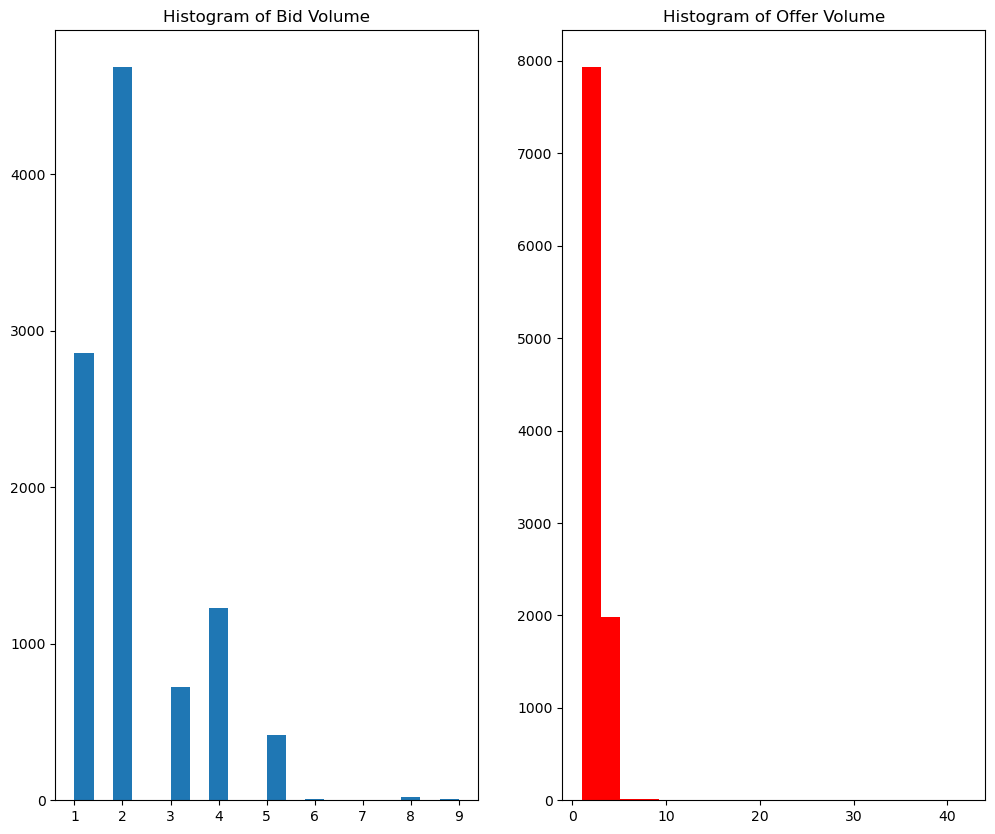

In [106]:
fig,ax=plt.subplots(1,2,figsize=(12,10))

ax[0].hist(simple_quotes['FB0'].values,bins=20)
ax[0].set_title("Histogram of Bid Volume")
ax[1].hist(simple_quotes['FA0'].values,bins=20, color='red')
ax[1].set_title("Histogram of Offer Volume")

### Time Dependent Volume

Text(0.5, 1.0, 'Histogram of Change in Offer Volume')

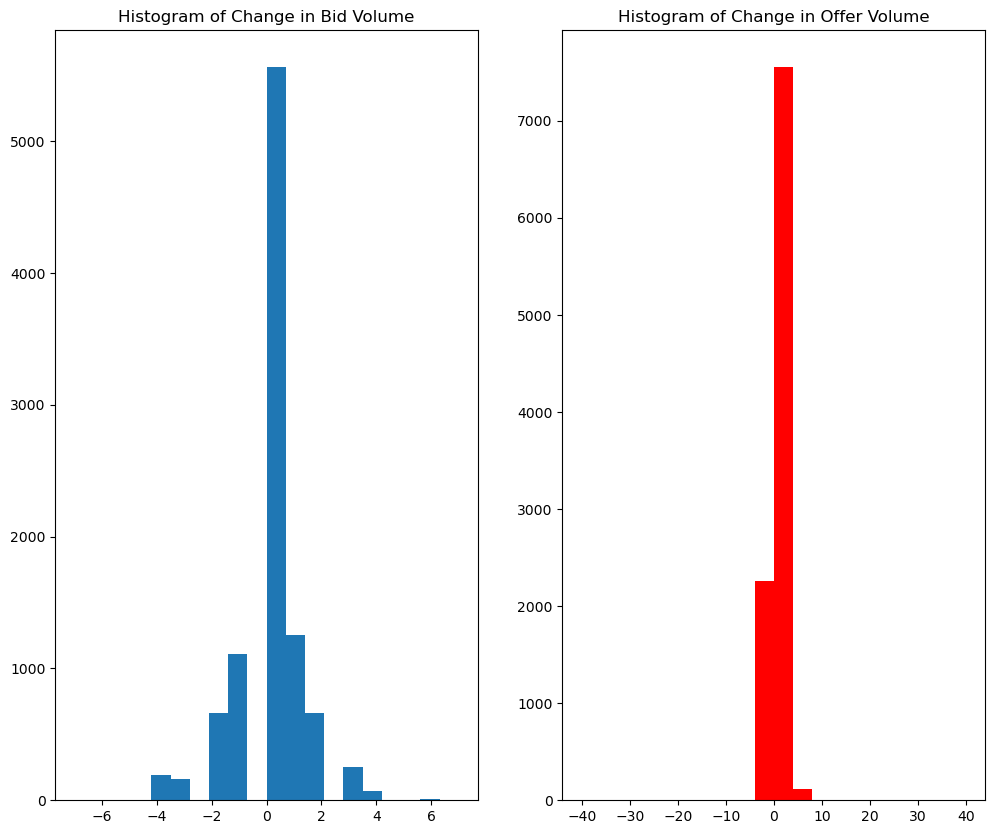

In [107]:
fig,ax=plt.subplots(1,2,figsize=(12,10))

ax[0].hist(simple_quotes['FB2'].values,bins=20)
ax[0].set_title("Histogram of Change in Bid Volume")
ax[1].hist(simple_quotes['FA2'].values,bins=20, color='red')
ax[1].set_title("Histogram of Change in Offer Volume")